## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**TASK: My overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.**

---
---

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("./Data/wine_fraud.csv")

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


Let's check the unique values in the target column (quality)?

In [13]:
df['quality'].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

### Data visualisation (exploration)

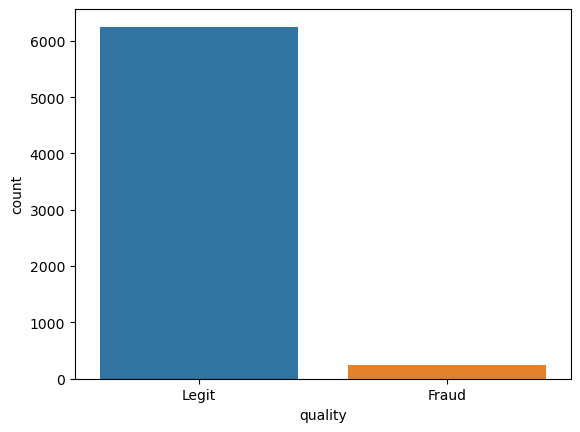

In [27]:
sns.countplot(data=df, x='quality', hue='quality');

**We notice that the dataset is imbalanced**

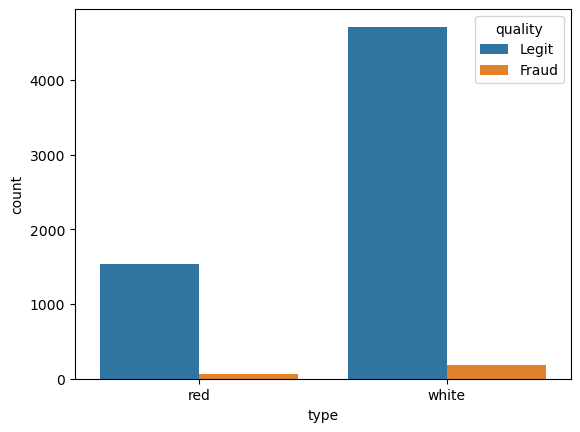

In [25]:
sns.countplot(data=df, x='type', hue='quality');

**Let's check what percentage of red wines are Fraud? and What percentage of white wines are fraud?**

In [36]:
reds = df[df['type'] == 'red'] # len(reds) --> total red wins
reds_frauds = reds[reds['quality'] == 'Fraud'] # len(reds_frauds) --> total frauds in red wins
red_frauds_share = (len(reds_frauds)*100)/len(reds)
print('Percentage of fraud in Red Wines:', round(red_frauds_share,2))

Percentage of fraud in Red Wines: 3.94


In [38]:
whites = df[df['type'] == 'white']
whites_frauds = whites[whites['quality'] == 'Fraud']
whites_frauds_share = (len(whites_frauds)*100)/len(whites)
print('Percentage of fraud in White Wines:', round(whites_frauds_share,2))

Percentage of fraud in White Wines: 3.74


**Let's calculate the correlation between the various features and the "quality" column. To do this we may need to map the column to 0 and 1 instead of a string.**

In [41]:
df['Quality_num'] = df['quality'].map({'Legit':0, 'Fraud':1})

In [70]:
correlations = df.drop(['quality', 'type'], axis=1).corr()['Quality_num'].sort_values()[:-1]
correlations

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Name: Quality_num, dtype: float64

Let's create a bar plot of the correlation values to Fraudlent wine.

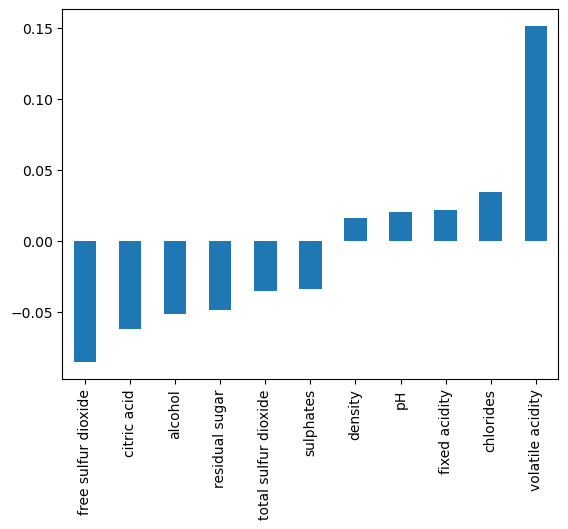

In [73]:
correlations.plot(kind='bar');

Let's create a clustermap with seaborn to explore the relationships between variables.

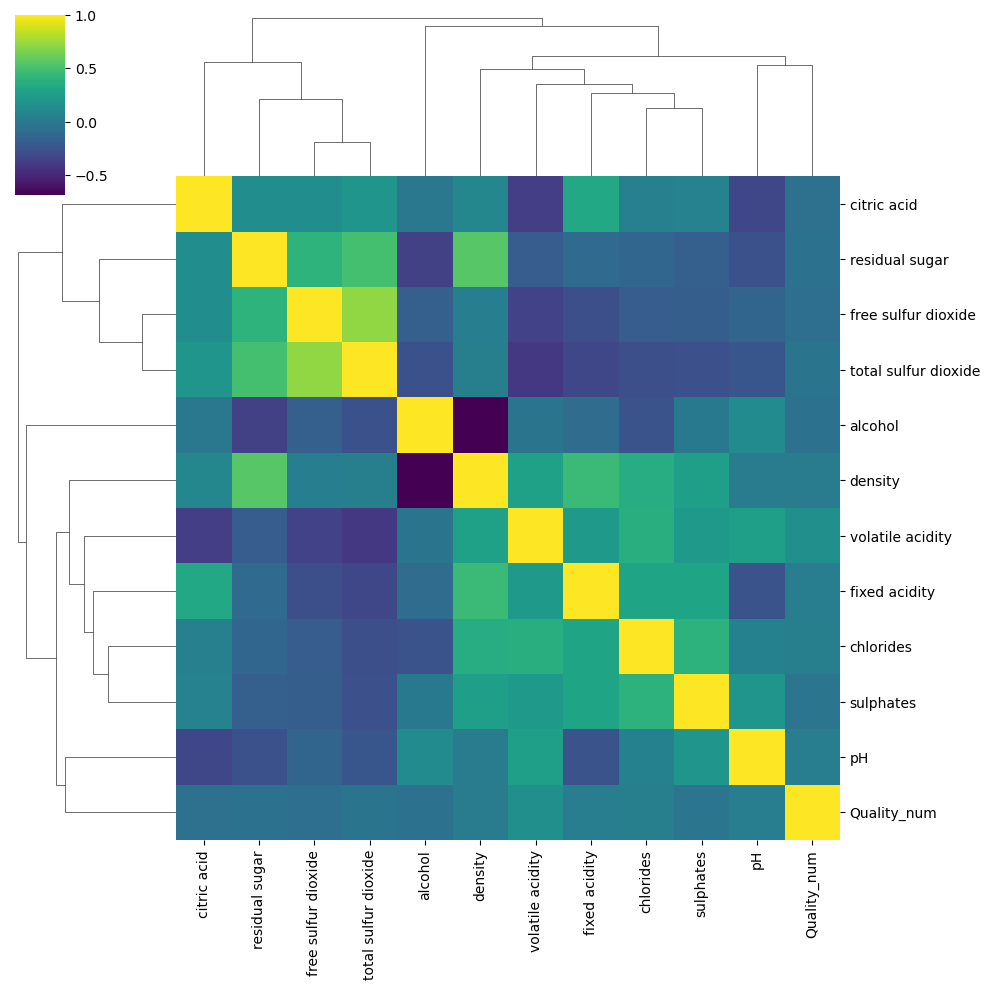

In [78]:
sns.clustermap(df.drop(['quality', 'type'], axis=1).corr(), cmap='viridis');

### Machine Learning Model development

Let's first convert the categorical column "type" from a string or "red" or "white" to dummy variables:

In [80]:
df = df.drop('Quality_num', axis=1)

In [86]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [88]:
df['type'] = pd.get_dummies(df['type'], drop_first=True, dtype='int')

In [90]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [102]:
X = df.drop('quality', axis=1)

In [104]:
y = df['quality']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [108]:
scaler = StandardScaler()

In [110]:
scaled_X_train = scaler.fit_transform(X_train)

In [112]:
scaled_X_test = scaler.transform(X_test)

Now, let's create an instance of a Support Vector Machine classifier. However, we already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. The argument is **class_weight**

In [123]:
model = SVC(class_weight='balanced')

Let's use a GridSearchCV to run a grid search for the best C and gamma parameters.

In [126]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1], 'kernel':['linear','rbf'], 'gamma':['scale','auto']}

In [128]:
grid_model = GridSearchCV(model, param_grid)

In [130]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [132]:
grid_model.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

### Model evaluation

In [135]:
y_pred = grid_model.predict(scaled_X_test)

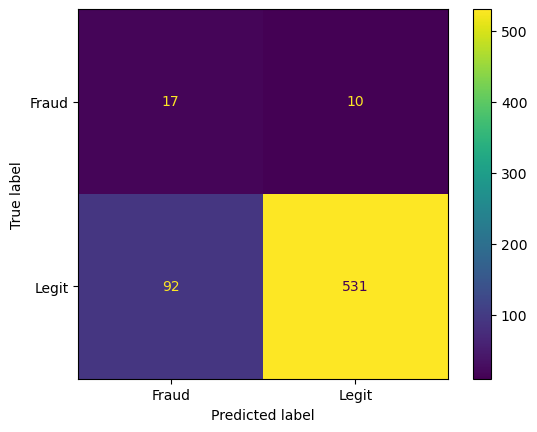

In [137]:
ConfusionMatrixDisplay.from_estimator(grid_model, scaled_X_test, y_test);

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



<p>
    <strong>Conclusion:</strong>
    <br>The f1 score and the precision of the model are very low, which means that the fraud cases have not been detected successfully. Therefore, the SVC is not suitable this dataset, and the model can't realistically work in real world.
</p>